In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:

df_data = pd.read_csv('data/all_data.csv')

Gráfico para ilustrar los errores por edad de los pilotos

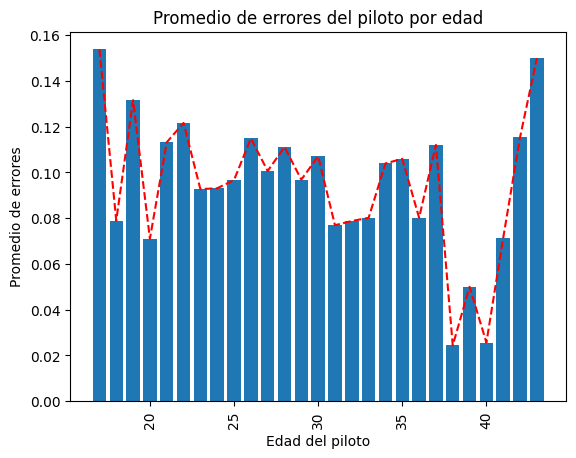

In [62]:
# Eliminamos los datos menos al año x
x = 2005
data = df_data.drop(df_data[df_data['year'] < x].index)

driver_fail_by_age = (data['race_finish'] == 'driver mistake').groupby(data['driver_age']).mean()
ages = driver_fail_by_age.index
averages = driver_fail_by_age.values

# Creamos el gráfico
plt.bar(ages, averages)

# Personalizamos el gráfico
plt.xlabel('Edad del piloto')
plt.ylabel('Promedio de errores')
plt.title('Promedio de errores del piloto por edad')
plt.xticks(rotation=90)
plt.plot(ages, averages, 'r--', label='Recta de tendencia')

# Mostramos los datos
plt.show()

Grafico para obtener las victorias saliendo en pole

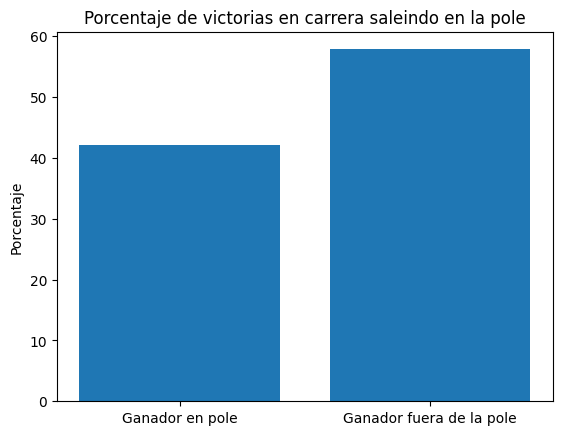

In [65]:
# Calculamos los porcentajes
total_winners = df_data[df_data['race_winner'] == 1]['race_winner'].sum()
winner_on_qualy_podium = df_data[(df_data['race_winner'] == 1) & (df_data['qualy_pole'] == 1)]['race_winner'].sum()
winner_on_qualy_podium_percentage = (winner_on_qualy_podium / total_winners) * 100

# Creamos el gráfico
labels = ['Ganador en pole', 'Ganador fuera de la pole']
values = [winner_on_qualy_podium_percentage, 100-winner_on_qualy_podium_percentage]
plt.bar(labels, values)

# Personalizamos el gráfico

plt.ylabel('Porcentaje')
plt.title('Porcentaje de victorias en carrera saleindo en la pole')

# Mostramos los datos
plt.show()

Grafico para obtener las victorias saliendo en las primeras posiciones

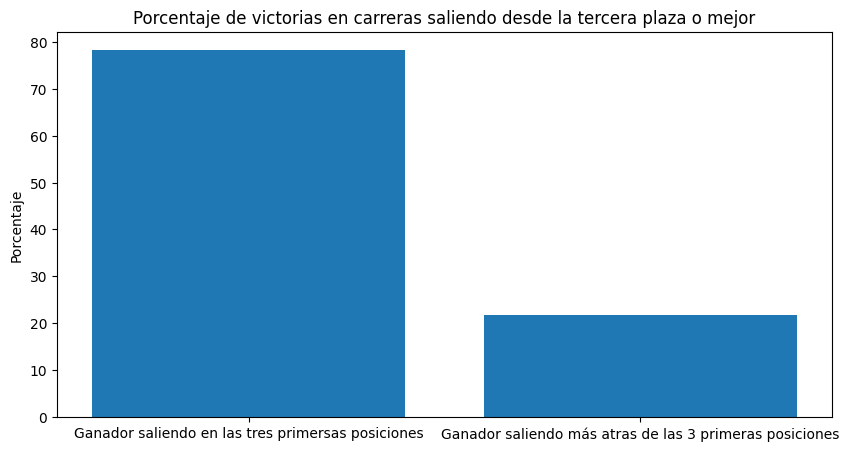

In [72]:
# Calculamos los porcentajes
total_winners = df_data[df_data['race_winner'] == 1]['race_winner'].sum()
winner_on_qualy_podium = df_data[(df_data['race_winner'] == 1) & (df_data['race_grid_position'] <= 3)]['race_winner'].sum()
winner_on_qualy_podium_percentage = (winner_on_qualy_podium / total_winners) * 100

# Creamos el gráfico
labels = ['Ganador saliendo en las tres primersas posiciones', 'Ganador saliendo más atras de las 3 primeras posiciones']
values = [winner_on_qualy_podium_percentage, 100-winner_on_qualy_podium_percentage]
plt.figure(figsize=(10,5))
plt.bar(labels, values)

# Personalizamos el gráfico
plt.ylabel('Porcentaje')
plt.title('Porcentaje de victorias en carreras saliendo desde la tercera plaza o mejor')

# Mostramos los datos
plt.show()

Gráfico de fiabilidad de los coches entre 2015-2018 

{'alfa': 0.9166666666666666, 'alphatauri': 0.8480392156862745, 'aston_martin': 0.9197530864197531, 'ferrari': 0.9166666666666666, 'haas': 0.8975903614457832, 'manor': 0.9358974358974359, 'mclaren': 0.7990196078431373, 'mercedes': 0.9607843137254902, 'racing_point': 0.9285714285714286, 'red_bull': 0.8774509803921569, 'renault': 0.8431372549019608, 'williams': 0.9117647058823529}


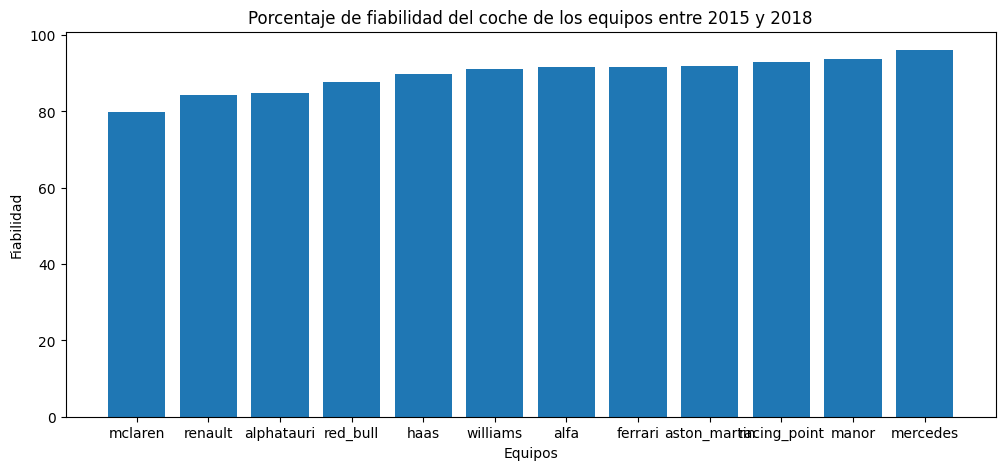

In [76]:
data = df_data.drop(df_data[df_data['year'] < 2015].index)
data = data.drop(df_data[df_data['year'] > 2019].index)

constructor_relaiblity_dict = (1 - ((data['race_finish'] == 'mechanical failure') | (data['race_finish'] == 'engine failure')).groupby(data['constructor_id']).mean()).to_dict()
print(constructor_relaiblity_dict)
sorted_data = {k: v*100 for k, v in sorted(constructor_relaiblity_dict.items(), key=lambda item: item[1])}

# Obtener las claves y los valores ordenados
keys = sorted_data.keys()
values = sorted_data.values()

# Creamos el gráfico
plt.figure(figsize=(12,5))
plt.bar(keys, values)

# Personalizamos el gráfico
plt.xlabel('Equipos')
plt.ylabel('Fiabilidad')
plt.title('Fiabilidad del coche de los equipos entre 2015 y 2018')

# Mostramos los datos
plt.show()

NADA

In [ ]:
# driver_fail = df_data.groupby('driver_id').sum()['driver_dnf']
# driver_race_entered = data.groupby('driver').count()['driver_dnf']
# driver_dnf_ratio = (dnf_by_driver*100/driver_race_entered).sort_values(ascending=False)
# plt.figure(figsize=(30,10))
# bars = plt.bar(x=driver_dnf_ratio.index,height=driver_dnf_ratio,align='center',width=0.5)
# plt.xticks(rotation=90)
# plt.xlabel('Drivers')
# plt.ylabel('Driver fail ratio')
# plt.title('DNFs ratio due to driver error')
# for bar in bars.patches:
#     yval = bar.get_height()
#     plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}',fontdict=font)
# plt.show()

***Gráficos de puntuación tras ajuste***

In [6]:
dict_final = {
    'DecisionTreeRegressor_manual': 0.1,
    'DecisionTreeRegressor_RFE': -0.1,
    'DecisionTreeRegressor_set_REF': 0.46143863,
    'RandomForestRegressor_manual': 0.4192,
    'RandomForestRegressor_set_REF': 0.442,
    'RandomForestRegressor_RFE': 0.4195
}

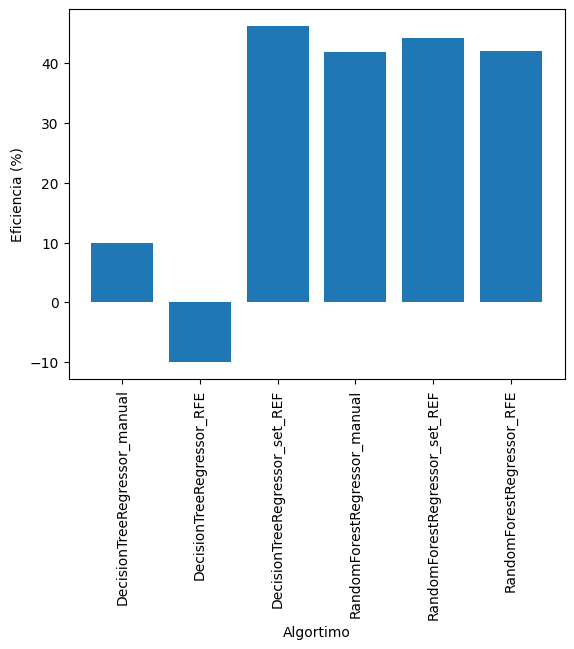

In [7]:
# for target in model_score.keys():
# diccionario_ordenado = dict(sorted(variable_obj_models_score[target].items(), key=lambda x: x[0]))
keys = dict_final.keys()
# keys = [palabra.replace('auto_race', 'RFE') for palabra in keys]
# keys = [palabra.replace('auto_winner', 'RFE') for palabra in keys]
# keys = [palabra.replace('auto_pole', 'RFE') for palabra in keys]
values = [item*100 for item in dict_final.values()]

# Crear el gráfico de barras
plt.bar(keys, values)

# Personalizar el gráfico
plt.xlabel('Algortimo')
plt.ylabel('Eficiencia (%)')
# plt.title(f'Eficiencia de los modelos para predecir {dict_target[target]}')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()